In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataframe=pd.read_csv(r'C:\Users\shiva\OneDrive\Desktop\Netflix\Zomato data .csv')
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


* Convert the data type of column-rate

In [3]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)
dataframe['rate']=dataframe['rate'].apply(handleRate)
dataframe.head()      

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


* 2.Type of resturant

Text(0.5, 0, 'type of resturant')

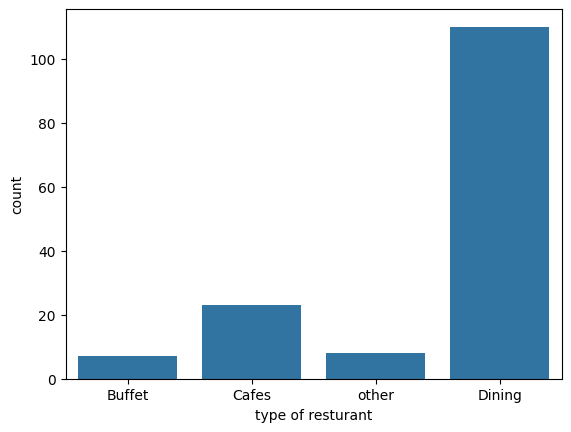

In [5]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("type of resturant")


* conclusion- majority of the resturant falls in dinning category.

2. how many votes has each type of resturant received from customes?

Text(0, 0.5, 'Votes')

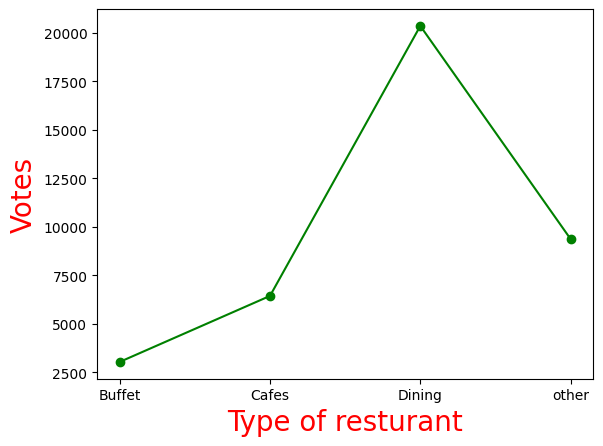

In [6]:
grouped_data= dataframe.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,c="green",marker="o")
plt.xlabel("Type of resturant", c="red", size=20)
plt.ylabel("Votes",c="red", size=20)


conclusion- dining resturant has recevied maximum votes

Text(0.5, 1.0, 'rating distribution')

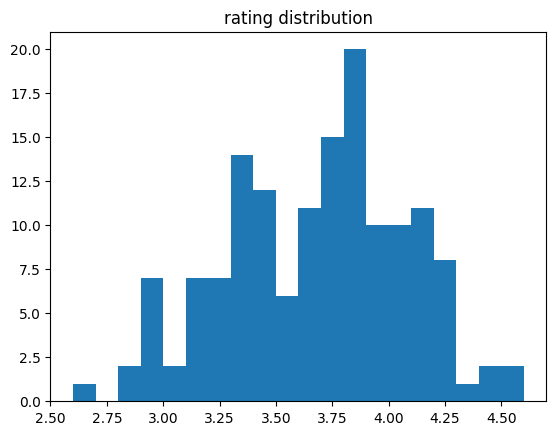

In [8]:
plt.hist(dataframe['rate'],bins=20)
plt.title("rating distribution")


* 3. conclusion -the majority resturants recevied rating from 3.5 tp 4

4.Average order spending by couples.

In [9]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

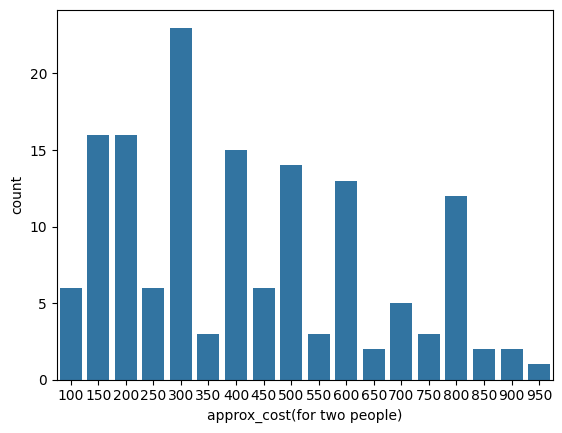

In [11]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

4.conclusion - the majority of couples perferr resturant with an approximate cost of 300 rupees

* 5. which modww (online/offline) has recevied the maximum rating?

<Axes: xlabel='online_order', ylabel='rate'>

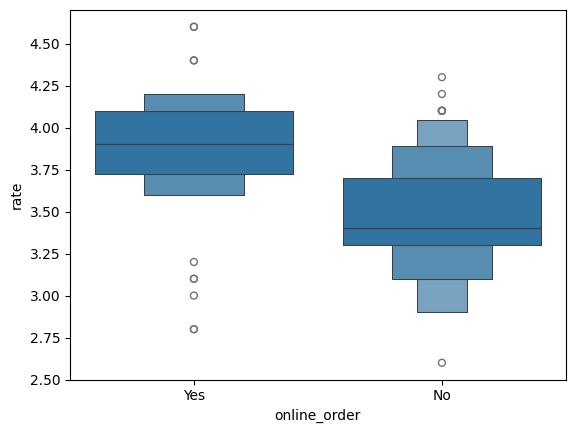

In [12]:
plt.Figure(figsize=(6,6))
sns.boxenplot(x='online_order',y='rate',data=dataframe)

* 5. conclusion - offline order received lower rating in comparision to online order

Text(50.722222222222214, 0.5, 'Listed In (Type)')

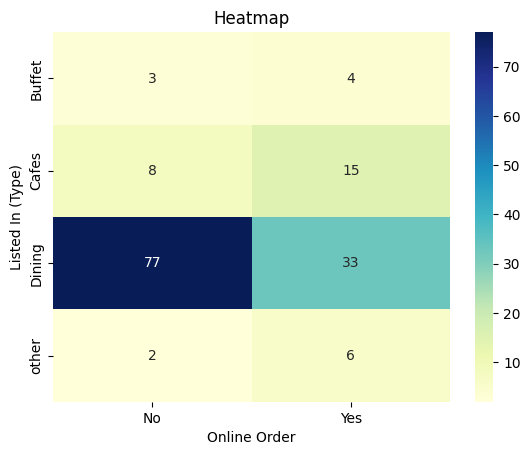

In [13]:
pivot_table=dataframe.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu',fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")